In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import plotly.offline as py
py.init_notebook_mode(connected=True)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score,precision_recall_curve)
import copy

In [7]:
#Data defination
attrition = pd.read_csv('3_sheets.csv')
attrition.head()

def intify(s):
    u = np.unique(s)
    i = np.arange(len(u))
    return s.map(dict(zip(u, i)))
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [14]:
a = attrition.columns.values
#c = attrition.dtypes
for col_name in a:
    if not np.issubdtype(attrition[col_name].dtype,np.number):
        attrition[[col_name]] = intify(attrition.get(col_name))

#pd.DataFrame(data=attrition, columns = [a[0]]).Age.dtype
#attrition.Department = intify(attrition.Department)
#attrition.Department
#not numpy.issubdtype(attrition['Age'].dtype,numpy.number)
attrition.to_csv('new_converted_data.csv')
attritions = np.array_split(attrition,3)
attritions[1]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1470,58,0,2,289,1,2,3,5,1,977,...,1,80,0,7,4,3,1,0,0,0
1471,50,1,1,946,1,8,1,1,1,2,...,4,80,1,11,3,3,11,7,1,8
1472,38,2,2,319,1,2,2,4,1,4,...,1,80,0,8,3,1,1,0,0,1
1473,34,1,1,684,1,3,4,1,1,5,...,3,80,0,9,3,2,9,7,3,1
1474,28,1,2,342,1,2,1,3,1,7,...,1,80,1,7,3,3,3,2,2,3
1475,33,1,1,1328,1,2,2,1,1,8,...,2,80,0,9,2,4,8,7,3,7
1476,60,1,2,1157,1,3,3,3,1,10,...,4,80,3,13,3,2,2,0,0,1
1477,31,1,2,138,1,24,1,1,1,11,...,4,80,1,2,2,3,2,0,0,1
1478,39,1,1,1158,1,23,3,1,1,12,...,1,80,0,11,2,3,10,7,1,9
1479,37,1,2,390,1,10,3,3,1,13,...,2,80,2,18,3,4,8,7,7,8


In [143]:
df = copy.deepcopy(attrition)
del df['Attrition']
del df['EmployeeNumber']
df['attrition'] = attrition.Attrition

In [144]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df.head()
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 1097
Number of observations in the test data: 373


In [159]:
features = df.columns[:33]
features

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [161]:
x_train = train
y_train = train['attrition']
train.head()

# Defining test
x_test = test
y_test = test['attrition']

In [173]:
# Create a random forest Classifier
clf = RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate to the training y (attrition_num)
clf.fit(train[features], y_train)

# Apply the Classifier we trained to the test data
clf.predict(test[features])

# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]
preds = clf.predict(test[features])

In [174]:
# Create confusion matrix, WHICH REALLY IS CONFUSING AT FIRST
pd.crosstab(test['attrition'], preds, rownames=['Actual Attrition'], colnames=['Predicted Attrition'])

# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

# The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of
#correct predictions.
score = accuracy_score(y_test, preds)
score_count = accuracy_score(y_test, preds, normalize=False)
print(score)
print(score_count)

0.868632707774799
324


In [187]:
f1_score(y_test, preds, average='binary')

0.2898550724637682

In [186]:
precision_recall_curve(y_test,preds,pos_label=1)

(array([0.14745308, 0.71428571, 1.        ]),
 array([1.        , 0.18181818, 0.        ]),
 array([0, 1]))

In [178]:
recall_score(y_test,preds)

0.18181818181818182

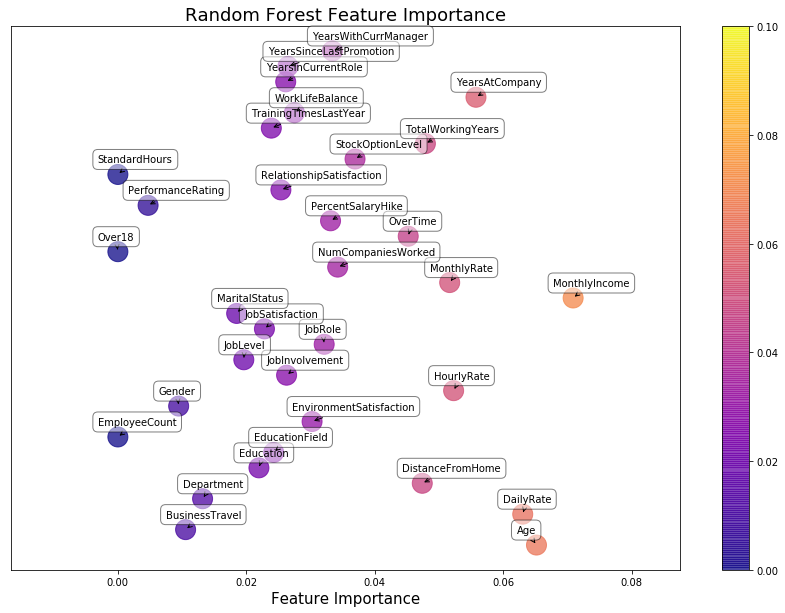

In [167]:
# Scatter plot
y = features
x = clf.feature_importances_
plt.figure(figsize=(15, 10))
plt.scatter(x, y, c=x, vmin=0, vmax=0.10, s=400, alpha = 0.75, cmap='plasma')
plt.colorbar()
#plt.ylabel('Attributes')
plt.xlabel('Feature Importance', fontsize=15)
plt.yticks([])
#plt.xticks(rotation=90)
plt.title('Random Forest Feature Importance', fontsize=18)
labels = features
for label, x, y in zip(labels, x, y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='left', va='top',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show() 

In [ ]:
f1_score(y_true, y_pred, average=None)